Estatística Aplicada à Computação/Engenharia da Computação Projeto II – Análise de Atividades Policiais em Rhode Island

Preparação dos dados para a análise Antes de iniciar sua análise, é fundamental que você primeiro examine e limpe o conjunto de dados, para tornar o trabalho com ele um processo mais eficiente. Nesta parte, você praticará a correção de tipos de dados, manipulação de valores ausentes e eliminação de colunas e linhas enquanto aprende sobre o conjunto de dados do Stanford Open Policing Project.
(a) Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos registros policiais estão catalogados;

15 variaveis e 91741 registros

In [31]:
import pandas as pd
import numpy as np
df = pd.read_csv('police (1).csv', )
df 


,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


(b) Conte o número de dados faltosos de cada variável

In [32]:
import pandas as pd
import numpy as np
df.isnull().sum().sort_values(ascending=False)[:15]

county_name           91741
search_type           88434
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
stop_outcome           5202
is_arrested            5202
stop_duration          5202
state                     0
stop_date                 0
stop_time                 0
search_conducted          0
drugs_related_stop        0
district                  0
dtype: int64

(c) Como estamos trabalhando somente com dados de um único estado, não faz sentido mantermos informações de variáveis como county_name e state. Exclua essas variáveis do conjunto

In [33]:
import pandas as pd
import numpy as np
df.drop("state",axis=1)
df.drop("county_name",axis=1)
df

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises. Como apenas uma pequena fração das linhas está faltando driver_gender, remova essas linhas do conjunto de dados;

In [34]:
import pandas as pd
import numpy as np
df.dropna(subset=['driver_gender'],inplace=True)
df

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [35]:
import pandas as pd
import numpy as np
df.isnull().sum().sort_values(ascending=False)[:15]

county_name           86536
search_type           83229
state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises. Como apenas uma pequena fração das linhas está faltando driver_gender, remova essas linhas do conjunto de dados;

In [36]:
import pandas as pd
import numpy as np
df.dropna(subset=['driver_gender'],inplace=True)
df

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [37]:
import pandas as pd
import numpy as np
df.isnull().sum().sort_values(ascending=False)[:15]

county_name           86536
search_type           83229
state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

(e) Vá na descrição dos dados e verifique que tipo de variável são search_conducted, is_arrested e district; depois compare com os tipos de dados que estão armazena- dos no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados para essas variáveis;

Distrito , distrito policial = inteiro search_conducted ,Indica se foi realizado algum tipo de busca = Booleano is_arrested

(f) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas: stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeandoa como stop_datetime e converta no formato data e hora (tipo datetime). Isso habilitará atributos baseados em data convenientes que usaremos posteriormente no projeto;

In [41]:
import pandas as pd
import numpy as np
df['stop_datetime'] = df['stop_date'] + " " + df['stop_time']
df['stop_datetime'] = pd.to_datetime(df['stop_datetime'])
df

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-31 21:21:00
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2015-12-31 21:59:00
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,2015-12-31 22:04:00
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,2015-12-31 22:09:00


In [42]:
df.dtypes

state                         object
stop_date                     object
stop_time                     object
county_name                  float64
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

(g) Por fim, transforme a coluna stop_datetime no índice do dataframe.

In [43]:

import pandas as pd
import numpy as np
df=df.set_index('stop_datetime')
df

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


2. Análise do gênero sobre as infrações
O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito?
Nesta parte, você explorará essa questão enquanto pratica filtragem, agrupamento e muito
mais!

(a) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infrações cometidas por todos os motoristas para obter uma compreensão básica dos dados.
Construa uma distribuição de frequências da variável violation e responda: qual a
infração mais comum e a menos notificada?

In [44]:
import pandas as pd
import numpy as np
df['violation_raw'].value_counts()

Speeding                            48423
Other Traffic Violation             16224
Equipment/Inspection Violation      10921
Registration Violation               3703
Seatbelt Violation                   2856
Special Detail/Directed Patrol       2467
Call for Service                     1391
Motorist Assist/Courtesy              205
Violation of City/Town Ordinance      181
APB                                    91
Suspicious Person                      56
Warrant                                18
Name: violation_raw, dtype: int64

infração mais comum:Speeding 
 infração menos comum: Warrant


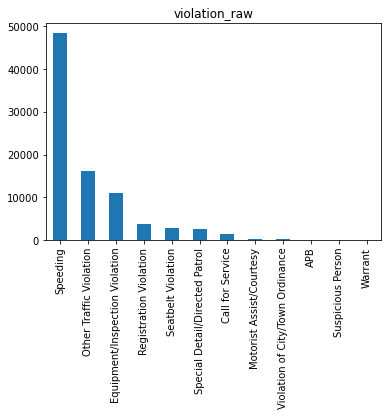

In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
df['violation_raw'].value_counts().plot.bar(title='violation_raw')
print('infração mais comum:Speeding \n infração menos comum: Warrant')

(b) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela de contingência para frequência absoluta e outra para frequência relativa, contendo a distribuição conjunta das variáveis driver_gender e violation.

<AxesSubplot:title={'center':'driver_gender'}>

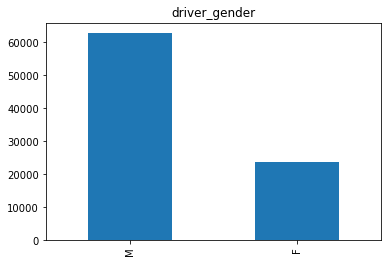

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
df['driver_gender'].value_counts().plot.bar(title='driver_gender')

In [50]:
import pandas as pd
import numpy as np
df_homem = df.loc[df['driver_gender'] == 'M']
df_mulher = df.loc[df['driver_gender'] == 'F']

fa_violação = pd.DataFrame({'FA|Masc': df_homem['violation'].value_counts(),
                         'FA|Fem': df_mulher['violation'].value_counts()}).rename_axis('FA Violações')

fr_violação = pd.DataFrame({'FR|Masc': np.around(df_homem['violation'].value_counts()/df['violation'].value_counts().sum()*100,decimals=2),
                         'FR|Fem': np.around(df_mulher['violation'].value_counts()/df['violation'].value_counts().sum()*100,decimals=2)}).rename_axis('FR Violações')

fr_violação

,FR|Masc,FR|Fem
FR Violações,,
Equipment,9.73,2.89
Moving violation,14.95,3.80
Other,4.28,0.82
Registration/plates,3.06,1.22
Seat belt,2.63,0.67
Speeding,37.88,18.08


(c) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas;

<AxesSubplot:title={'center':' '}, xlabel='FR Violações'>

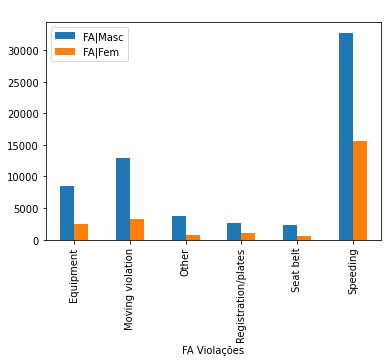

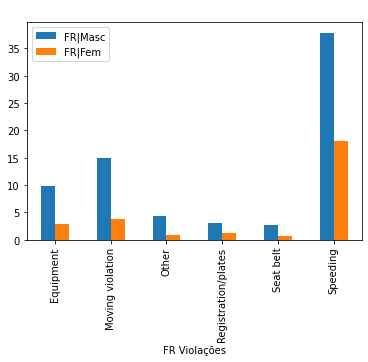

In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
fa_violação.plot.bar(title=' ')
fr_violação.plot.bar(title=' ')

D) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma tabela de contingência considerando as variáveis driver_gender e stop_outcome e então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um "Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);

In [53]:
import pandas as pd
import numpy as np
df_homem = df.loc[df['driver_gender'] == 'M']
df_mulher = df.loc[df['driver_gender'] == 'F']

faa_violação = pd.DataFrame({'FA|Masc': df_homem['violation'].value_counts(),
                         'FA|Fem': df_mulher['violation'].value_counts()}).rename_axis('FA Violações')

frstop_outcome = pd.DataFrame({'FR|Masc': np.around(df_homem['stop_outcome'].value_counts()/df['stop_outcome'].value_counts().sum()*100,decimals=2),
                         'FR|Fem': np.around(df_mulher['stop_outcome'].value_counts()/df['stop_outcome'].value_counts().sum()*100,decimals=2)}).rename_axis('outcome')

frstop_outcome

,FR|Masc,FR|Fem
outcome,,
Arrest Driver,2.52,0.64
Arrest Passenger,0.27,0.13
Citation,64.53,24.56
N/D,0.51,0.19
No Action,0.49,0.23
Warning,4.22,1.72


E) O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta, primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em uma revista de veículo

In [54]:
import pandas as pd
import numpy as np
df_homem = df.loc[df['driver_gender'] == 'M']
df_mulher = df.loc[df['driver_gender'] == 'F']

faa_parada= pd.DataFrame({'FA|Masc': df_homem['search_conducted'].value_counts(),
                         'FA|Fem': df_mulher['search_conducted'].value_counts()}).rename_axis('parada')

frstop_outcome = pd.DataFrame({'FR|Masc': np.around(df_homem['search_conducted'].value_counts()/df['search_conducted'].value_counts().sum()*100,decimals=2),
                         'FR|Fem': np.around(df_mulher['search_conducted'].value_counts()/df['search_conducted'].value_counts().sum()*100,decimals=2)}).rename_axis('search_conducted')


faa_parada

,FA|Masc,FA|Fem
parada,,
False,59911,23318
True,2851,456


In [55]:
frstop_outcome

,FR|Masc,FR|Fem
search_conducted,,
False,69.23,26.95
True,3.29,0.53


F)Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo tempo ;

<AxesSubplot:xlabel='driver_gender'>

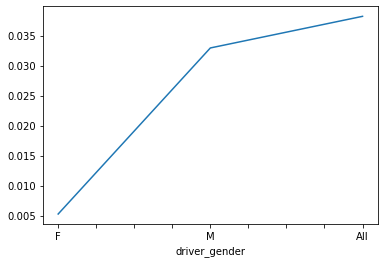

In [56]:
Dff = pd.crosstab(df['driver_gender'], df['search_conducted'], normalize= True, margins= True)
result = Dff[True]
result.plot()

(g) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infração, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?

,Equipment %,Moving violation %,Other %,Registration/plates %,Seat belt %,Speeding %,Total %
Sexo,,,,,,,
F,2.890127,3.797264,0.817001,1.220301,0.667930,18.080337,27.472959
M,9.730055,14.951003,4.277988,3.058843,2.632430,37.876722,72.527041
Total,12.620181,18.748267,5.094989,4.279144,3.300361,55.957058,100.000000


<AxesSubplot:xlabel='Sexo'>

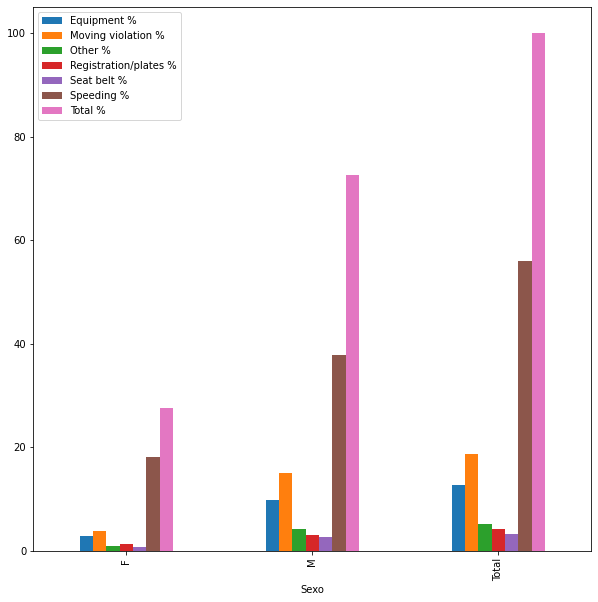

In [57]:
import pandas as pd
import numpy as np
tablag = pd.crosstab(df['driver_gender'], df['violation'], margins= True, margins_name='Total', normalize= True, rownames=["Sexo"])*100
newColumns = []

for i in list(tablag.columns):
    newColumns.append(i + " %")
tablag.columns = newColumns

display(tablag)
tablag.plot.bar(figsize = (10, 10))

3)Análise exploratória visual dos dados É mais provável que você seja preso em uma determinada hora do dia? As paradas relacionadas às drogas estão aumentando? Nesta parte, você responderá a essas e outras questões analisando o conjunto de dados visualmente, uma vez que os gráficos podem ajudá-lo a entender as tendências de uma forma que o exame dos dados brutos não pode.

(a) Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em todas as paradas no DataFrame, calculando a média da coluna is_arrested ;

In [63]:
df['is_arrested'].mean()

0.0355690117407784

In [64]:
df['is_arrested'].value_counts

<bound method IndexOpsMixin.value_counts of stop_datetime
2005-01-04 12:55:00    False
2005-01-23 23:15:00    False
2005-02-17 04:15:00    False
2005-02-20 17:15:00     True
2005-02-24 01:20:00    False
                       ...  
2015-12-31 21:21:00    False
2015-12-31 21:59:00    False
2015-12-31 22:04:00    False
2015-12-31 22:09:00    False
2015-12-31 22:47:00    False
Name: is_arrested, Length: 86536, dtype: object>

In [65]:
df['stop_time'].value_counts()

11:00    339
10:00    313
10:30    275
09:30    269
14:00    254
        ... 
05:11      1
05:34      1
05:23      1
04:21      1
05:48      1
Name: stop_time, Length: 1424, dtype: int64

(b) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice. A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso, agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate com os valores encontrados da taxa de prisão por hora;

In [94]:
import pandas as pd
import numpy as np
df['stop_time'].value_counts()

11:00    339
10:00    313
10:30    275
09:30    269
14:00    254
        ... 
05:11      1
05:34      1
05:23      1
04:21      1
05:48      1
Name: stop_time, Length: 1424, dtype: int64

In [90]:
import pandas as pd
import numpy as np
hourly_arrest_rate = df.groupby(by=lambda x: x.hour)['is_arrested']
hourly_arrest_rate = pd.DataFrame(hourly_arrest_rate.value_counts())
hourly_arrest_rate

is_arrested
   is_arrested             
0  False               4574
   True                 248
1  False               3773
   True                 262
2  False               2518
   True                 163
3  False                993
   True                  64
4  False                238
   True                  12
5  False                179
   True                   8
6  False               3070
   True                  43
7  False               4317
   True                  57
8  False               4834
   True                 108
9  False               6265
   True                 162
10 False               6889
   True                 200
11 False               5545
   True                 165
12 False               3346
   True                 130
13 False               4409
   True                 140
14 False               5163
   True                 163
15 False               4613
   True                 146
16 False               3418
   True                 125
17 False               2480
   True                 105
18 False               2014
   True                  80
19 False               2371
   True                  79
20 False               3029
   True                 120
21 False               1232
   True                  85
22 False               3245
   True                 166
23 False               4943
   True                 247

In [88]:
df.dtypes

state                  object
stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
district               object
dtype: object

(d) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão
se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica
se drogas foram encontradas durante uma determinada parada. Você calculará a taxa
anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para
visualizar como a taxa mudou ao longo do tempo;

2005     16
2006     73
2007     72
2008     62
2009     71
2010     72
2011     75
2012    103
2013     99
2014    120
2015     99
Name: drugs_related_stop, dtype: int64

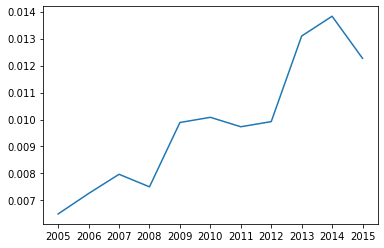

In [103]:
drogas = df.groupby(by=lambda x: x.year)['drugs_related_stop'].mean()

indx = list(drogas.keys())
drogas.plot(xticks = range(indx[0], indx[-1]+1))
display(df.groupby(by=lambda x: x.year)['drugs_related_stop'].sum())


(e) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de
abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos.
Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo.
Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted
e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e
Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os
dados desse resultado da concatenação;


<AxesSubplot:>

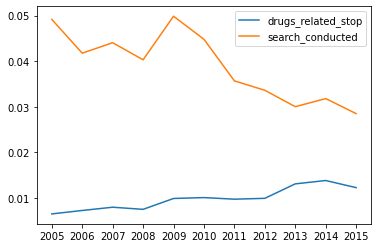

In [105]:
Annual_search_rate = df[['drugs_related_stop', 'search_conducted']].groupby(by=lambda x: x.year).mean()


Annual_search_rate.plot(xticks = range(2005,2016))





(f) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos
como zonas. Como as zonas se comparam em termos de quais infrações são detectadas
pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e
violation, usando uma tabela de contingência. 

"district_violation.loc[['Zone K1', 'Zone K3']].plot.bar()"

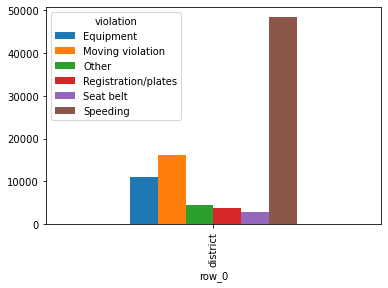

In [122]:
district_violation = pd.crosstab(['district'],df['violation'])
district_violation.plot.bar()
"district_violation.loc[['Zone K1', 'Zone K3']].plot.bar() ERRO"


In [ ]:
4. Analisando o efeito do clima no policiamento
Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar
o impacto das condições meteorológicas no comportamento da polícia durante as paradas de
trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de
dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas

(a) Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o conjunto, selecione as variáveis relativas à temperatura (TMIN, TAVG, TMAX), imprima as
principais medidas resumo usando o comando describe e plote os três boxplots dessas
variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com
base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se
de que a temperatura é medida em graus Fahrenheit, não Celsius!

In [125]:
clima = pd.read_csv("weather.csv")
clima

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CLIMA relativamente frio


,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


,TMIN,TAVG,TMAX
0,35,44.0,53
1,28,36.0,44
2,44,49.0,53
3,39,42.0,45
4,28,36.0,43
...,...,...,...
4012,44,51.0,61
4013,30,40.0,44
4014,28,33.0,40
4015,27,30.0,35


<AxesSubplot:>

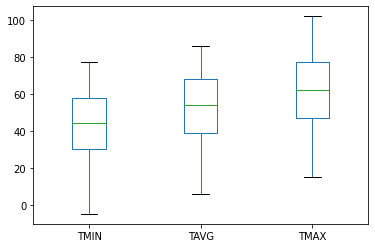

In [130]:
print("CLIMA relativamente frio")
Weather = clima[['TMIN', 'TAVG', 'TMAX']]


display(Weather.describe())
display(Weather)

Weather.plot.box()


(b) Para a variável TDIFF, que representa a diferença entre as temperaturas, apresente as
medidas resumo e plote um histograma para essa variável. O que pode dizer sobre a
distribuição de dados?


<AxesSubplot:>

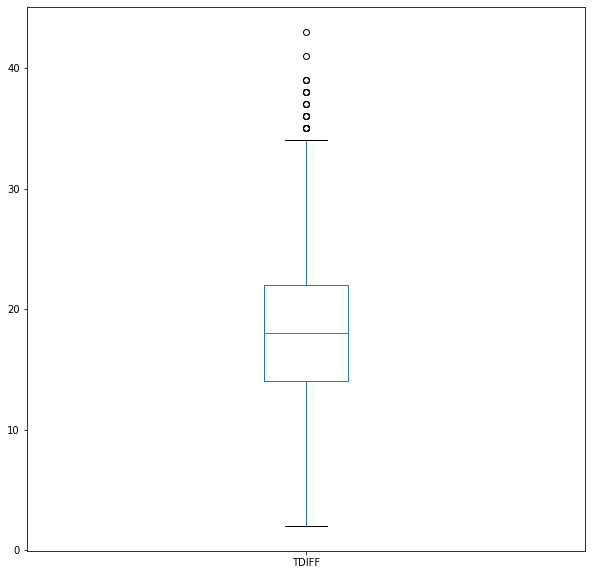

In [131]:
clima['TDIFF'] = weather['TMAX'] - weather['TMIN']

clima['TDIFF'].plot.box(figsize = (10,10))

(c) Você agora preparará os DataFrames das abordagens de trânsito e de classificação do
clima (o dessa sessão) para que estejam prontos para serem mesclados. No DataFrame
sobre abordagens no trânsito, você transformará o índice stop_datetime para uma coluna (reset_index), pois o índice será perdido durante a mesclagem. Com o DataFrame
meteorológico, selecione as colunas DATE e rating e coloque em um novo dataframe;

In [134]:
df.reset_index(inplace= True)

fWeather = clima['DATE']
fWeather

0       2005-01-01
1       2005-01-02
2       2005-01-03
3       2005-01-04
4       2005-01-05
           ...    
4012    2015-12-27
4013    2015-12-28
4014    2015-12-29
4015    2015-12-30
4016    2015-12-31
Name: DATE, Length: 4017, dtype: object

(d) Agora, mescle os dataframes gerados em um novo dataframe, unidos usando a coluna
stop_date de do dataframe policial e a coluna DATE do novo dataframe gerado a partir
dos dados meteorológicos. Assim que a mesclagem for concluída, defina stop_datetime
novamente como o índice;

In [137]:
dfWeather = pd.merge(df, clima, left_index=True, right_index=True).set_index('stop_datetime')

In [138]:
dfWeather

,level_0,index,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,0,0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
2005-01-23 23:15:00,1,1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16
2005-02-17 04:15:00,2,2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9
2005-02-20 17:15:00,3,3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6
2005-02-24 01:20:00,4,4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-02-22 10:06:00,4012,4012,RI,2006-02-22,10:06,NaN,F,White,Other Traffic Violation,Moving violation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2006-02-22 10:10:00,4013,4013,RI,2006-02-22,10:10,NaN,F,White,Speeding,Speeding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2006-02-22 10:10:00,4014,4014,RI,2006-02-22,10:10,NaN,M,White,Speeding,Speeding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


(e) A partir desse novo dataframe criado, levante duas questões e as responda usando qualquer técnica que ache necessária.

questão 1:
crie um novo dataframe dropando wt13


In [139]:
dffwt= dfWeather.drop("WT13",axis=1)
dffwt

,level_0,index,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,...,WT11,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,0,0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
2005-01-23 23:15:00,1,1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16
2005-02-17 04:15:00,2,2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9
2005-02-20 17:15:00,3,3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6
2005-02-24 01:20:00,4,4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-02-22 10:06:00,4012,4012,RI,2006-02-22,10:06,NaN,F,White,Other Traffic Violation,Moving violation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2006-02-22 10:10:00,4013,4013,RI,2006-02-22,10:10,NaN,F,White,Speeding,Speeding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2006-02-22 10:10:00,4014,4014,RI,2006-02-22,10:10,NaN,M,White,Speeding,Speeding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


questão 2:
indique qual a violação mais frequente

In [ ]:
dfWeather.value_couts()